# Find precipitation value for pulsed and upslope storms divided into 5 wind regimes

In [1]:
import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/Weathermast_Retrieval_MEPS/')

import numpy as np
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt

import createFolder as cF
np.warnings.filterwarnings('ignore')

import seaborn
import fct_windspeed_sorting as fct

In [2]:
m = ['11', '12', '01', '02', '03']
station = 'Haukeliseter'

In [3]:
savefig = 0
if savefig == 1:
    figdir = '../../Figures/Weathermast_MEPS_Retrieval/%s/wind_precip' %(station)
    cF.createFolder('%s/' %figdir)
form = 'png'

In [4]:
f = dict()
obs_precip_diff      = dict()
obs_precip_diff_2deg = dict()
obs_west_idx         = dict()
obs_east_idx         = dict()
obs_wind_dir         = dict()
obs_wind_speed       = dict()
    
meps_precip_diff     = dict()
meps_precip_diff_2deg= dict()
meps_west_idx        = dict()
meps_east_idx        = dict()
meps_wind_dir        = dict()
meps_wind_speed      = dict()
    
ret_precip_diff      = dict()


for month in m:
    if month == '11':
#        t = np.arange(8,31)
        t = [9, 12, 13, 14, 15, 16, 17, 23, 24, 26,29,30]
    if month == '12': #or  or 
 #       t = np.arange(1,32)
        t = [7, 9, 10, 11, 12, 13, 15, 21, 22, 23, 24, 25, 26, 29, 30, 31]
    if month == '01':
        t = [2, 3, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 28, 29]
    if month == '02':
  #      t = np.arange(1,29)
        t = [2, 3, 4, 6]
    if month == '03':
        t = [9, 14, 16, 17, 19, 21, 24, 30, 31]
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        Date = int(year+month+day)
        nc_dir = '../../Data/Weathermast_MEPS_Retrieval/'+station+'/weathermast_meps_retrieval_%s.nc' %(Date)

        f[Date] = netCDF4.Dataset(nc_dir, 'r')

        obs_wind_dir[Date]         = f[Date].variables['obs_wind_direction'][:]
        obs_wind_speed[Date]       = f[Date].variables['obs_wind_speed'][:]
        obs_precip_diff[Date]      = f[Date].variables['obs_precipitation_difference'][:]
        obs_precip_diff_2deg[Date] = f[Date].variables['obs_precipitation_difference_2degC'][:]
        obs_west_idx[Date]         = f[Date].variables['obs_idx_westerly'][:].astype(int)
        obs_east_idx[Date]         = f[Date].variables['obs_idx_easterly'][:].astype(int)

        meps_wind_dir[Date]        = f[Date].variables['meps_wind_direction'][:]
        meps_wind_speed[Date]      = f[Date].variables['meps_wind_speed'][:]
        meps_precip_diff[Date]     = f[Date].variables['meps_precipitation_difference'][:]
        meps_precip_diff_2deg[Date]= f[Date].variables['meps_precipitation_difference_2degC'][:]
        meps_west_idx[Date]        = f[Date].variables['meps_idx_westerly'][:]
        meps_east_idx[Date]        = f[Date].variables['meps_idx_easterly'][:]

        ret_precip_diff[Date]      = f[Date].variables['ret_precipitation_difference'][:]

        f[Date].close()

        ############################################
       


In [5]:
### double fence observation
obs_precip_west_0_4, obs_precip_east_0_4, \
obs_precip_west_4_8, obs_precip_east_4_8, \
obs_precip_west_8_12, obs_precip_east_8_12, \
obs_precip_west_12_16,obs_precip_east_12_16, \
obs_precip_west_16_20,obs_precip_east_16_20, \
obs_precip_west_20,obs_precip_east_20 =  fct.get_precip_amount_for_wind_speed(obs_precip_diff_2deg, obs_wind_dir, obs_west_idx, obs_east_idx, obs_wind_speed)

In [6]:
obs_precip_west_ws = [np.nansum(obs_precip_west_0_4[:,:],axis= 0),
                      np.nansum(obs_precip_west_4_8[:,:],axis= 0),
                      np.nansum(obs_precip_west_8_12[:,:],axis= 0),
                      np.nansum(obs_precip_west_12_16[:,:],axis= 0),
                      np.nansum(obs_precip_west_16_20[:,:],axis= 0),
                      np.nansum(obs_precip_west_20[:,:],axis= 0)]
obs_precip_west_ws = np.array(obs_precip_west_ws)
obs_precip_west_ws[np.where(obs_precip_west_ws[:,:] == 0.0)] = np.nan

obs_precip_east_ws = [np.nansum(obs_precip_east_0_4[:,:],axis= 0),
                      np.nansum(obs_precip_east_4_8[:,:],axis= 0),
                      np.nansum(obs_precip_east_8_12[:,:],axis= 0),
                      np.nansum(obs_precip_east_12_16[:,:],axis= 0),
                      np.nansum(obs_precip_east_16_20[:,:],axis= 0),
                      np.nansum(obs_precip_east_20[:,:],axis= 0)]
obs_precip_east_ws = np.array(obs_precip_east_ws)
obs_precip_east_ws[np.where(obs_precip_east_ws[:,:] == 0.0)] = np.nan

In [7]:
obs_precip_west_0_4[np.where(obs_precip_west_0_4[:,1] == 0.),1] = np.nan
obs_west_0_4 = obs_precip_west_0_4[:,1]
obs_west_0_4[~np.isnan(obs_precip_west_0_4[:,1])] = 1.0

obs_precip_east_0_4[np.where(obs_precip_east_0_4[:,1] == 0.),1] = np.nan
obs_east_0_4 = obs_precip_east_0_4[:,1]
obs_east_0_4[~np.isnan(obs_precip_east_0_4[:,1])] = 1.0

obs_precip_west_4_8[np.where(obs_precip_west_4_8[:,1] == 0.),1] = np.nan
obs_west_4_8 = obs_precip_west_4_8[:,1]
obs_west_4_8[~np.isnan(obs_precip_west_4_8[:,1])] = 1.0

obs_precip_east_4_8[np.where(obs_precip_east_4_8[:,1] == 0.),1] = np.nan
obs_east_4_8 = obs_precip_east_4_8[:,1]
obs_east_4_8[~np.isnan(obs_precip_east_4_8[:,1])] = 1.0

obs_precip_west_8_12[np.where(obs_precip_west_8_12[:,1] == 0.),1] = np.nan
obs_west_8_12 = obs_precip_west_8_12[:,1]
obs_west_8_12[~np.isnan(obs_precip_west_8_12[:,1])] = 1.0

obs_precip_east_8_12[np.where(obs_precip_east_8_12[:,1] == 0.),1] = np.nan
obs_east_8_12 = obs_precip_east_8_12[:,1]
obs_east_8_12[~np.isnan(obs_precip_east_8_12[:,1])] = 1.0

obs_precip_west_12_16[np.where(obs_precip_west_12_16[:,1] == 0.),1] = np.nan
obs_west_12_16 = obs_precip_west_12_16[:,1]
obs_west_12_16[~np.isnan(obs_precip_west_12_16[:,1])] = 1.0

obs_precip_east_12_16[np.where(obs_precip_east_12_16[:,1] == 0.),1] = np.nan
obs_east_12_16 = obs_precip_east_12_16[:,1]
obs_east_12_16[~np.isnan(obs_precip_east_12_16[:,1])] = 1.0

obs_precip_west_16_20[np.where(obs_precip_west_16_20[:,1] == 0.),1] = np.nan
obs_west_16_20 = obs_precip_west_16_20[:,1]
obs_west_16_20[~np.isnan(obs_precip_west_16_20[:,1])] = 1.0

obs_precip_east_16_20[np.where(obs_precip_east_16_20[:,1] == 0.),1] = np.nan
obs_east_16_20 = obs_precip_east_16_20[:,1]
obs_east_16_20[~np.isnan(obs_precip_east_16_20[:,1])] = 1.0

obs_precip_west_20[np.where(obs_precip_west_20[:,1] == 0.),1] = np.nan
obs_west_20 = obs_precip_west_20[:,1]
obs_west_20[~np.isnan(obs_precip_west_20[:,1])] = 1.0

obs_precip_east_20[np.where(obs_precip_east_20[:,1] == 0.),1] = np.nan
obs_east_20 = obs_precip_east_20[:,1]
obs_east_20[~np.isnan(obs_precip_east_20[:,1])] = 1.0

In [8]:
obs_west_count = [np.nansum(obs_west_0_4),
                  np.nansum(obs_west_4_8),
                  np.nansum(obs_west_8_12),
                  np.nansum(obs_west_12_16),
                  np.nansum(obs_west_16_20),
                  np.nansum(obs_west_20)]
obs_west_count = np.array(obs_west_count)
obs_west_count[np.where(obs_west_count[:] == 0)] = np.nan
obs_west_count

obs_east_count = [np.nansum(obs_east_0_4),
                  np.nansum(obs_east_4_8),
                  np.nansum(obs_east_8_12),
                  np.nansum(obs_east_12_16),
                  np.nansum(obs_east_16_20),
                  np.nansum(obs_east_20)]
obs_east_count = np.array(obs_east_count)
obs_east_count[np.where(obs_east_count[:] == 0)] = np.nan
obs_east_count

array([34., 23.,  8., nan, nan, nan])

In [9]:
### retrieved values
ret_precip_west_0_4, ret_precip_east_0_4, \
ret_precip_west_4_8, ret_precip_east_4_8, \
ret_precip_west_8_12, ret_precip_east_8_12, \
ret_precip_west_12_16,ret_precip_east_12_16, \
ret_precip_west_16_20,ret_precip_east_16_20, \
ret_precip_west_20,ret_precip_east_20 =  fct.get_precip_amount_for_wind_speed(ret_precip_diff, obs_wind_dir, obs_west_idx, obs_east_idx, obs_wind_speed)


In [10]:
ret_precip_west_ws = [np.nansum(ret_precip_west_0_4[:,:],axis= 0),
                      np.nansum(ret_precip_west_4_8[:,:],axis= 0),
                      np.nansum(ret_precip_west_8_12[:,:],axis= 0),
                      np.nansum(ret_precip_west_12_16[:,:],axis= 0),
                      np.nansum(ret_precip_west_16_20[:,:],axis= 0),
                      np.nansum(ret_precip_west_20[:,:],axis= 0)]
ret_precip_west_ws = np.array(ret_precip_west_ws)
ret_precip_west_ws[np.where(ret_precip_west_ws[:,:] == 0.0)] = np.nan

ret_precip_east_ws = [np.nansum(ret_precip_east_0_4[:,:],axis= 0),
                      np.nansum(ret_precip_east_4_8[:,:],axis= 0),
                      np.nansum(ret_precip_east_8_12[:,:],axis= 0),
                      np.nansum(ret_precip_east_12_16[:,:],axis= 0),
                      np.nansum(ret_precip_east_16_20[:,:],axis= 0),
                      np.nansum(ret_precip_east_20[:,:],axis= 0)]
ret_precip_east_ws = np.array(ret_precip_east_ws)
ret_precip_east_ws[np.where(ret_precip_east_ws[:,:] == 0.0)] = np.nan

In [11]:
ret_precip_west_0_4[np.where(ret_precip_west_0_4[:,1] == 0.),1] = np.nan
ret_west_0_4 = ret_precip_west_0_4[:,1]
ret_west_0_4[~np.isnan(ret_precip_west_0_4[:,1])] = 1.0

ret_precip_east_0_4[np.where(ret_precip_east_0_4[:,1] == 0.),1] = np.nan
ret_east_0_4 = ret_precip_east_0_4[:,1]
ret_east_0_4[~np.isnan(ret_precip_east_0_4[:,1])] = 1.0

ret_precip_west_4_8[np.where(ret_precip_west_4_8[:,1] == 0.),1] = np.nan
ret_west_4_8 = ret_precip_west_4_8[:,1]
ret_west_4_8[~np.isnan(ret_precip_west_4_8[:,1])] = 1.0

ret_precip_east_4_8[np.where(ret_precip_east_4_8[:,1] == 0.),1] = np.nan
ret_east_4_8 = ret_precip_east_4_8[:,1]
ret_east_4_8[~np.isnan(ret_precip_east_4_8[:,1])] = 1.0

ret_precip_west_8_12[np.where(ret_precip_west_8_12[:,1] == 0.),1] = np.nan
ret_west_8_12 = ret_precip_west_8_12[:,1]
ret_west_8_12[~np.isnan(ret_precip_west_8_12[:,1])] = 1.0

ret_precip_east_8_12[np.where(ret_precip_east_8_12[:,1] == 0.),1] = np.nan
ret_east_8_12 = ret_precip_east_8_12[:,1]
ret_east_8_12[~np.isnan(ret_precip_east_8_12[:,1])] = 1.0

ret_precip_west_12_16[np.where(ret_precip_west_12_16[:,1] == 0.),1] = np.nan
ret_west_12_16 = ret_precip_west_12_16[:,1]
ret_west_12_16[~np.isnan(ret_precip_west_12_16[:,1])] = 1.0

ret_precip_east_12_16[np.where(ret_precip_east_12_16[:,1] == 0.),1] = np.nan
ret_east_12_16 = ret_precip_east_12_16[:,1]
ret_east_12_16[~np.isnan(ret_precip_east_12_16[:,1])] = 1.0

ret_precip_west_16_20[np.where(ret_precip_west_16_20[:,1] == 0.),1] = np.nan
ret_west_16_20 = ret_precip_west_16_20[:,1]
ret_west_16_20[~np.isnan(ret_precip_west_16_20[:,1])] = 1.0

ret_precip_east_16_20[np.where(ret_precip_east_16_20[:,1] == 0.),1] = np.nan
ret_east_16_20 = ret_precip_east_16_20[:,1]
ret_east_16_20[~np.isnan(ret_precip_east_16_20[:,1])] = 1.0

ret_precip_west_20[np.where(ret_precip_west_20[:,1] == 0.),1] = np.nan
ret_west_20 = ret_precip_west_20[:,1]
ret_west_20[~np.isnan(ret_precip_west_20[:,1])] = 1.0

ret_precip_east_20[np.where(ret_precip_east_20[:,1] == 0.),1] = np.nan
ret_east_20 = ret_precip_east_20[:,1]
ret_east_20[~np.isnan(ret_precip_east_20[:,1])] = 1.0

In [12]:
ret_west_count = [np.nansum(ret_west_0_4),
                  np.nansum(ret_west_4_8),
                  np.nansum(ret_west_8_12),
                  np.nansum(ret_west_12_16),
                  np.nansum(ret_west_16_20),
                  np.nansum(ret_west_20)]
ret_west_count = np.array(ret_west_count)
ret_west_count[np.where(ret_west_count[:] == 0)] = np.nan
ret_west_count

ret_east_count = [np.nansum(ret_east_0_4),
                  np.nansum(ret_east_4_8),
                  np.nansum(ret_east_8_12),
                  np.nansum(ret_east_12_16),
                  np.nansum(ret_east_16_20),
                  np.nansum(ret_east_20)]
ret_east_count = np.array(ret_east_count)
ret_east_count[np.where(ret_east_count[:] == 0)] = np.nan
ret_east_count

array([31., 21.,  6., nan, nan, nan])

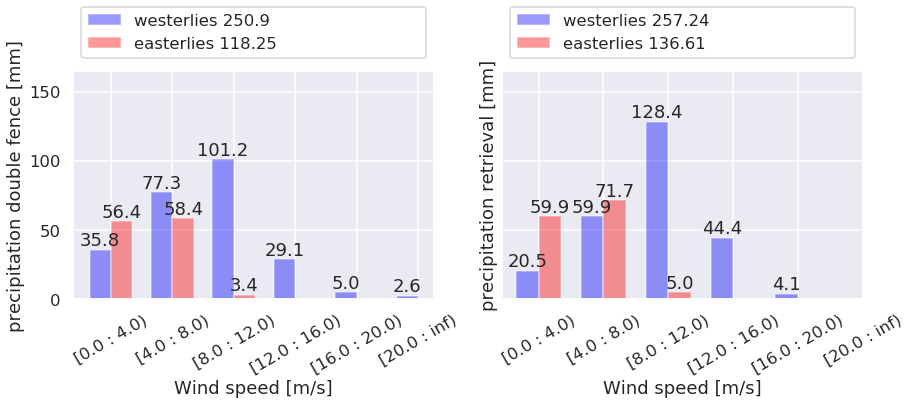

In [13]:
plt.rcParams.update({'font.size': 14})
seaborn.set_style("darkgrid")
seaborn.set_context("talk")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)


bar11= ax1.bar(np.arange(obs_precip_west_ws.shape[0])-bar_width/2, 
              obs_precip_west_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %(np.round(np.nansum(obs_precip_west_ws[:,1]),2)))
bar12 = ax1.bar(np.arange(obs_precip_east_ws.shape[0])+bar_width/2, 
              obs_precip_east_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %(np.round(np.nansum(obs_precip_east_ws[:,1]),2)))
ax1.set_ylim([0, 165])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('precipitation double fence [mm]')
ax1.set_xticks(np.arange(obs_precip_west_ws.shape[0]))
ax1.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
# Add counts above the two bar graphs
for rect in bar11 + bar12:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(np.round(height,1)), ha='center', va='bottom')
#ax1.set_title('double fence')
ax1.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')


bar21= ax2.bar(np.arange(ret_precip_west_ws.shape[0])-bar_width/2, 
              ret_precip_west_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %(np.round(np.nansum(ret_precip_west_ws[:,1]),2)))
bar22 = ax2.bar(np.arange(ret_precip_east_ws.shape[0])+bar_width/2, 
              ret_precip_east_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %(np.round(np.nansum(ret_precip_east_ws[:,1]),2)))

ax2.set_xlabel('Wind speed [m/s]')
ax2.set_ylabel('precipitation retrieval [mm]')
ax2.set_xticks(np.arange(ret_precip_west_ws.shape[0]))
ax2.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
# Add counts above the two bar graphs
for rect in bar21 + bar22:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(np.round(height,1)), ha='center', va='bottom')
#ax2.set_title('retrieval')
ax2.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')

plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_ret'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

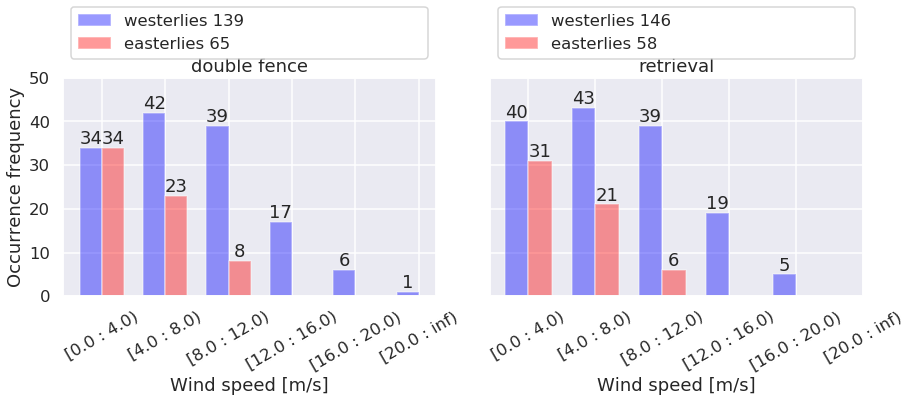

In [14]:
plt.rcParams.update({'font.size': 14})
seaborn.set_style("darkgrid")
seaborn.set_context("talk")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)


bar11= ax1.bar(np.arange(obs_west_count.shape[0])-bar_width/2, 
              obs_west_count[:], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %int(np.round(np.nansum(obs_west_count[:]),0)))
bar12 = ax1.bar(np.arange(obs_east_count.shape[0])+bar_width/2, 
              obs_east_count[:], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %int(np.round(np.nansum(obs_east_count[:]),0)))
ax1.set_ylim([0, 50])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Occurrence frequency')
ax1.set_xticks(np.arange(obs_west_count.shape[0]))
ax1.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
# Add counts above the two bar graphs
for rect in bar11 + bar12:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % int(np.round(height,0)), ha='center', va='bottom')
ax1.set_title('double fence')
ax1.legend(bbox_to_anchor=(0,1.05,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')


bar21= ax2.bar(np.arange(ret_west_count.shape[0])-bar_width/2, 
              ret_west_count[:], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %int(np.round(np.nansum(ret_west_count[:]),0)))
bar22 = ax2.bar(np.arange(ret_east_count.shape[0])+bar_width/2, 
              ret_east_count[:], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %int(np.round(np.nansum(ret_east_count[:]),0)))

ax2.set_xlabel('Wind speed [m/s]')
#ax2.set_ylabel('Occurrence frequency')
ax2.set_xticks(np.arange(ret_precip_west_ws.shape[0]))
ax2.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
ax2.set_title('retrieval')
# Add counts above the two bar graphs
for rect in bar21 + bar22:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % int(np.round(height,0)), ha='center', va='bottom')
ax2.legend(bbox_to_anchor=(0,1.05,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')

plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_ret_count'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

## MEPS

In [15]:
### meps forecast
meps_precip_west_0_4, meps_precip_east_0_4, \
meps_precip_west_4_8, meps_precip_east_4_8, \
meps_precip_west_8_12, meps_precip_east_8_12, \
meps_precip_west_12_16,meps_precip_east_12_16, \
meps_precip_west_16_20,meps_precip_east_16_20, \
meps_precip_west_20,meps_precip_east_20 =  fct.get_precip_amount_for_wind_speed_MEPS(meps_precip_diff_2deg, meps_wind_dir, meps_west_idx, meps_east_idx, meps_wind_speed)

In [16]:
meps_precip_west_ws = [np.nansum(meps_precip_west_0_4[:,:],axis= 0),
                      np.nansum(meps_precip_west_4_8[:,:],axis= 0),
                      np.nansum(meps_precip_west_8_12[:,:],axis= 0),
                      np.nansum(meps_precip_west_12_16[:,:],axis= 0),
                      np.nansum(meps_precip_west_16_20[:,:],axis= 0),
                      np.nansum(meps_precip_west_20[:,:],axis= 0)]
meps_precip_west_ws = np.array(meps_precip_west_ws)
meps_precip_west_ws[np.where(meps_precip_west_ws[:,:] == 0.0)] = np.nan

meps_precip_west_ws_mean = np.nanmean(meps_precip_west_ws[:,1:], axis = 1)

meps_precip_east_ws = [np.nansum(meps_precip_east_0_4[:,:],axis= 0),
                      np.nansum(meps_precip_east_4_8[:,:],axis= 0),
                      np.nansum(meps_precip_east_8_12[:,:],axis= 0),
                      np.nansum(meps_precip_east_12_16[:,:],axis= 0),
                      np.nansum(meps_precip_east_16_20[:,:],axis= 0),
                      np.nansum(meps_precip_east_20[:,:],axis= 0)]
meps_precip_east_ws = np.array(meps_precip_east_ws)
meps_precip_east_ws[np.where(meps_precip_east_ws[:,:] == 0.0)] = np.nan

meps_precip_east_ws_mean = np.nanmean(meps_precip_east_ws[:,1:], axis = 1)

In [17]:
meps_west_0_4 = np.empty(shape=(meps_precip_west_0_4.shape))
meps_west_0_4[:] = np.nan
meps_east_0_4 = np.empty(shape=(meps_precip_east_0_4.shape))
meps_east_0_4[:] = np.nan

meps_west_4_8 = np.empty(shape=(meps_precip_west_4_8.shape))
meps_west_4_8[:] = np.nan
meps_east_4_8 = np.empty(shape=(meps_precip_east_4_8.shape))
meps_east_4_8[:] = np.nan

meps_west_8_12 = np.empty(shape=(meps_precip_west_8_12.shape))
meps_west_8_12[:] = np.nan
meps_east_8_12 = np.empty(shape=(meps_precip_east_8_12.shape))
meps_east_8_12[:] = np.nan

meps_west_12_16 = np.empty(shape=(meps_precip_west_12_16.shape))
meps_west_12_16[:] = np.nan
meps_east_12_16 = np.empty(shape=(meps_precip_east_12_16.shape))
meps_east_12_16[:] = np.nan

meps_west_16_20 = np.empty(shape=(meps_precip_west_16_20.shape))
meps_west_16_20[:] = np.nan
meps_east_16_20 = np.empty(shape=(meps_precip_east_16_20.shape))
meps_east_16_20[:] = np.nan

meps_west_20 = np.empty(shape=(meps_precip_west_20.shape))
meps_west_20[:] = np.nan
meps_east_20 = np.empty(shape=(meps_precip_east_20.shape))
meps_east_20[:] = np.nan

In [18]:
for ens_memb in range(10):
    meps_precip_west_0_4[np.where(meps_precip_west_0_4[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_0_4[:,ens_memb+1] = meps_precip_west_0_4[:,ens_memb+1]
    meps_west_0_4[~np.isnan(meps_precip_west_0_4[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_0_4[np.where(meps_precip_east_0_4[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_0_4[:,ens_memb+1] = meps_precip_east_0_4[:,ens_memb+1]
    meps_east_0_4[~np.isnan(meps_precip_east_0_4[:,ens_memb+1]),ens_memb+1] = 1.0

    meps_precip_west_4_8[np.where(meps_precip_west_4_8[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_4_8[:,ens_memb+1] = meps_precip_west_4_8[:,ens_memb+1]
    meps_west_4_8[~np.isnan(meps_precip_west_4_8[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_4_8[np.where(meps_precip_east_4_8[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_4_8[:,ens_memb+1] = meps_precip_east_4_8[:,ens_memb+1]
    meps_east_4_8[~np.isnan(meps_precip_east_4_8[:,ens_memb+1]),ens_memb+1] = 1.0

    meps_precip_west_8_12[np.where(meps_precip_west_8_12[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_8_12[:,ens_memb+1] = meps_precip_west_8_12[:,ens_memb+1]
    meps_west_8_12[~np.isnan(meps_precip_west_8_12[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_8_12[np.where(meps_precip_east_8_12[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_8_12[:,ens_memb+1] = meps_precip_east_8_12[:,ens_memb+1]
    meps_east_8_12[~np.isnan(meps_precip_east_8_12[:,ens_memb+1]),ens_memb+1] = 1.0

    meps_precip_west_12_16[np.where(meps_precip_west_12_16[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_12_16[:,ens_memb+1] = meps_precip_west_12_16[:,ens_memb+1]
    meps_west_12_16[~np.isnan(meps_precip_west_12_16[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_12_16[np.where(meps_precip_east_12_16[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_12_16[:,ens_memb+1] = meps_precip_east_12_16[:,ens_memb+1]
    meps_east_12_16[~np.isnan(meps_precip_east_12_16[:,ens_memb+1]),ens_memb+1] = 1.0

    meps_precip_west_16_20[np.where(meps_precip_west_16_20[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_16_20[:,ens_memb+1] = meps_precip_west_16_20[:,ens_memb+1]
    meps_west_16_20[~np.isnan(meps_precip_west_16_20[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_16_20[np.where(meps_precip_east_16_20[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_16_20[:,ens_memb+1] = meps_precip_east_16_20[:,ens_memb+1]
    meps_east_16_20[~np.isnan(meps_precip_east_16_20[:,ens_memb+1]),ens_memb+1] = 1.0

    meps_precip_west_20[np.where(meps_precip_west_20[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_west_20[:,ens_memb+1] = meps_precip_west_20[:,ens_memb+1]
    meps_west_20[~np.isnan(meps_precip_west_20[:,ens_memb+1]),ens_memb+1] = 1.0
    meps_precip_east_20[np.where(meps_precip_east_20[:,ens_memb+1] == 0.),ens_memb+1] = np.nan
    meps_east_20[:,ens_memb+1] = meps_precip_east_20[:,ens_memb+1]
    meps_east_20[~np.isnan(meps_precip_east_20[:,ens_memb+1]),ens_memb+1] = 1.0

In [19]:
meps_west_count = [np.nansum(meps_west_0_4[:,1:],axis=0),
                  np.nansum(meps_west_4_8[:,1:],axis=0),
                  np.nansum(meps_west_8_12[:,1:],axis=0),
                  np.nansum(meps_west_12_16[:,1:],axis=0),
                  np.nansum(meps_west_16_20[:,1:],axis=0),
                  np.nansum(meps_west_20[:,1:],axis=0)]
meps_west_count = np.array(meps_west_count)
meps_west_count[np.where(meps_west_count[:,:] == 0)] = np.nan
meps_west_count
meps_west_count_mean = np.nanmean(meps_west_count[:,:], axis = 1)

meps_east_count = [np.nansum(meps_east_0_4[:,1:],axis=0),
                  np.nansum(meps_east_4_8[:,1:],axis=0),
                  np.nansum(meps_east_8_12[:,1:],axis=0),
                  np.nansum(meps_east_12_16[:,1:],axis=0),
                  np.nansum(meps_east_16_20[:,1:],axis=0),
                  np.nansum(meps_east_20[:,1:],axis=0)]
meps_east_count = np.array(meps_east_count)
meps_east_count[np.where(meps_east_count[:,:] == 0)] = np.nan
meps_east_count
meps_east_count_mean = np.nanmean(meps_east_count[:,:], axis = 1)


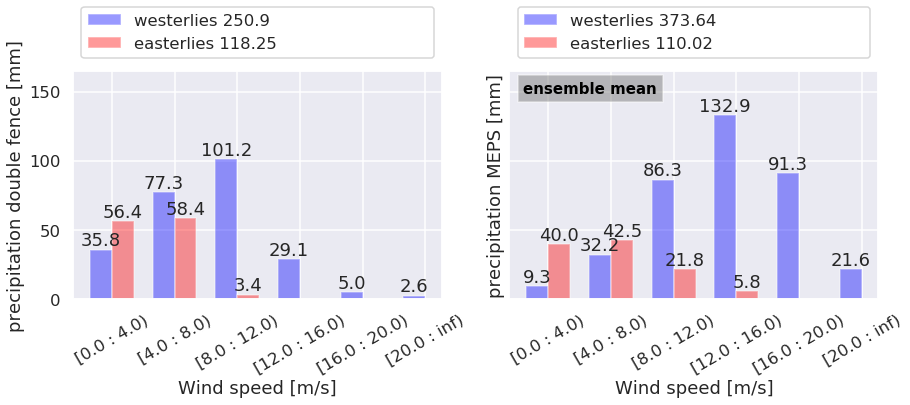

In [20]:
### for ensemble mean
plt.rcParams.update({'font.size': 14})
seaborn.set_style("darkgrid")
seaborn.set_context("talk")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)


bar11= ax1.bar(np.arange(obs_precip_west_ws.shape[0])-bar_width/2, 
              obs_precip_west_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %(np.round(np.nansum(obs_precip_west_ws[:,1]),2)))
bar12 = ax1.bar(np.arange(obs_precip_east_ws.shape[0])+bar_width/2, 
              obs_precip_east_ws[:,1], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %(np.round(np.nansum(obs_precip_east_ws[:,1]),2)))
ax1.set_ylim([0, 165])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('precipitation double fence [mm]')
ax1.set_xticks(np.arange(obs_precip_west_ws.shape[0]))
ax1.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
# Add counts above the two bar graphs
for rect in bar11 + bar12:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(np.round(height,1)), ha='center', va='bottom')
#ax1.set_title('double fence')
ax1.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')


bar21= ax2.bar(np.arange(meps_precip_west_ws_mean.shape[0])-bar_width/2, 
              meps_precip_west_ws_mean[:,], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %(np.round(np.nansum(meps_precip_west_ws_mean[:,]),2)))
bar22 = ax2.bar(np.arange(meps_precip_east_ws_mean.shape[0])+bar_width/2, 
              meps_precip_east_ws_mean[:,], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %(np.round(np.nansum(meps_precip_east_ws_mean[:,]),2)))

ax2.set_xlabel('Wind speed [m/s]')
ax2.set_ylabel('precipitation MEPS [mm]')
ax2.set_xticks(np.arange(meps_precip_east_ws_mean.shape[0]))
ax2.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
ax2.text(0.4, 0.89, 'ensemble mean',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='black', fontsize=15, fontweight='bold', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})
    
# Add counts above the two bar graphs
for rect in bar21 + bar22:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(np.round(height,1)), ha='center', va='bottom')
#ax2.set_title('retrieval')
ax2.legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')

plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_ensemble_mean'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

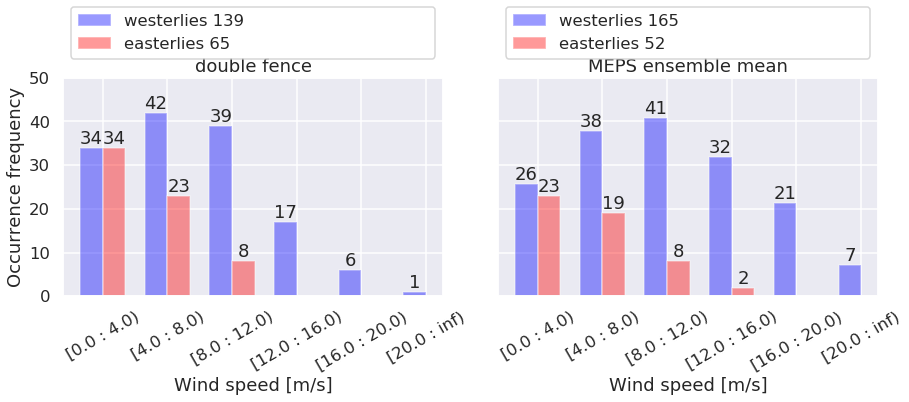

In [21]:
plt.rcParams.update({'font.size': 14})
seaborn.set_style("darkgrid")
seaborn.set_context("talk")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(13)
f.subplots_adjust(hspace=.35, wspace=.15)


bar11= ax1.bar(np.arange(obs_west_count.shape[0])-bar_width/2, 
              obs_west_count[:], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %int(np.round(np.nansum(obs_west_count[:]),0)))
bar12 = ax1.bar(np.arange(obs_east_count.shape[0])+bar_width/2, 
              obs_east_count[:], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %int(np.round(np.nansum(obs_east_count[:]),0)))
ax1.set_ylim([0, 50])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Occurrence frequency')
ax1.set_xticks(np.arange(obs_west_count.shape[0]))
ax1.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
# Add counts above the two bar graphs
for rect in bar11 + bar12:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % int(np.round(height,0)), ha='center', va='bottom')
ax1.set_title('double fence')
ax1.legend(bbox_to_anchor=(0,1.05,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')


bar21= ax2.bar(np.arange(meps_west_count_mean.shape[0])-bar_width/2, 
              meps_west_count_mean[:,], width = bar_width,
       align='center', alpha=opacity, color='b', label='westerlies %s' %int(np.round(np.nansum(meps_west_count_mean[:,]),0)))
bar22 = ax2.bar(np.arange(meps_east_count_mean.shape[0])+bar_width/2, 
              meps_east_count_mean[:,], width = bar_width,
       align='center', alpha=opacity, color='r', label='easterlies %s' %int(np.round(np.nansum(meps_east_count_mean[:,]),0)))


ax2.set_xlabel('Wind speed [m/s]')
#ax2.set_ylabel('Occurrence frequency')
ax2.set_xticks(np.arange(ret_precip_west_ws.shape[0]))
ax2.set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)
ax2.set_title('MEPS ensemble mean')
# Add counts above the two bar graphs
for rect in bar21 + bar22:
    height = rect.get_height()
    if np.isnan(height):
        continue
    else:
        ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % int(np.round(height,0)), ha='center', va='bottom')
ax2.legend(bbox_to_anchor=(0,1.05,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')


plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_obs_ensemble_mean_count'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

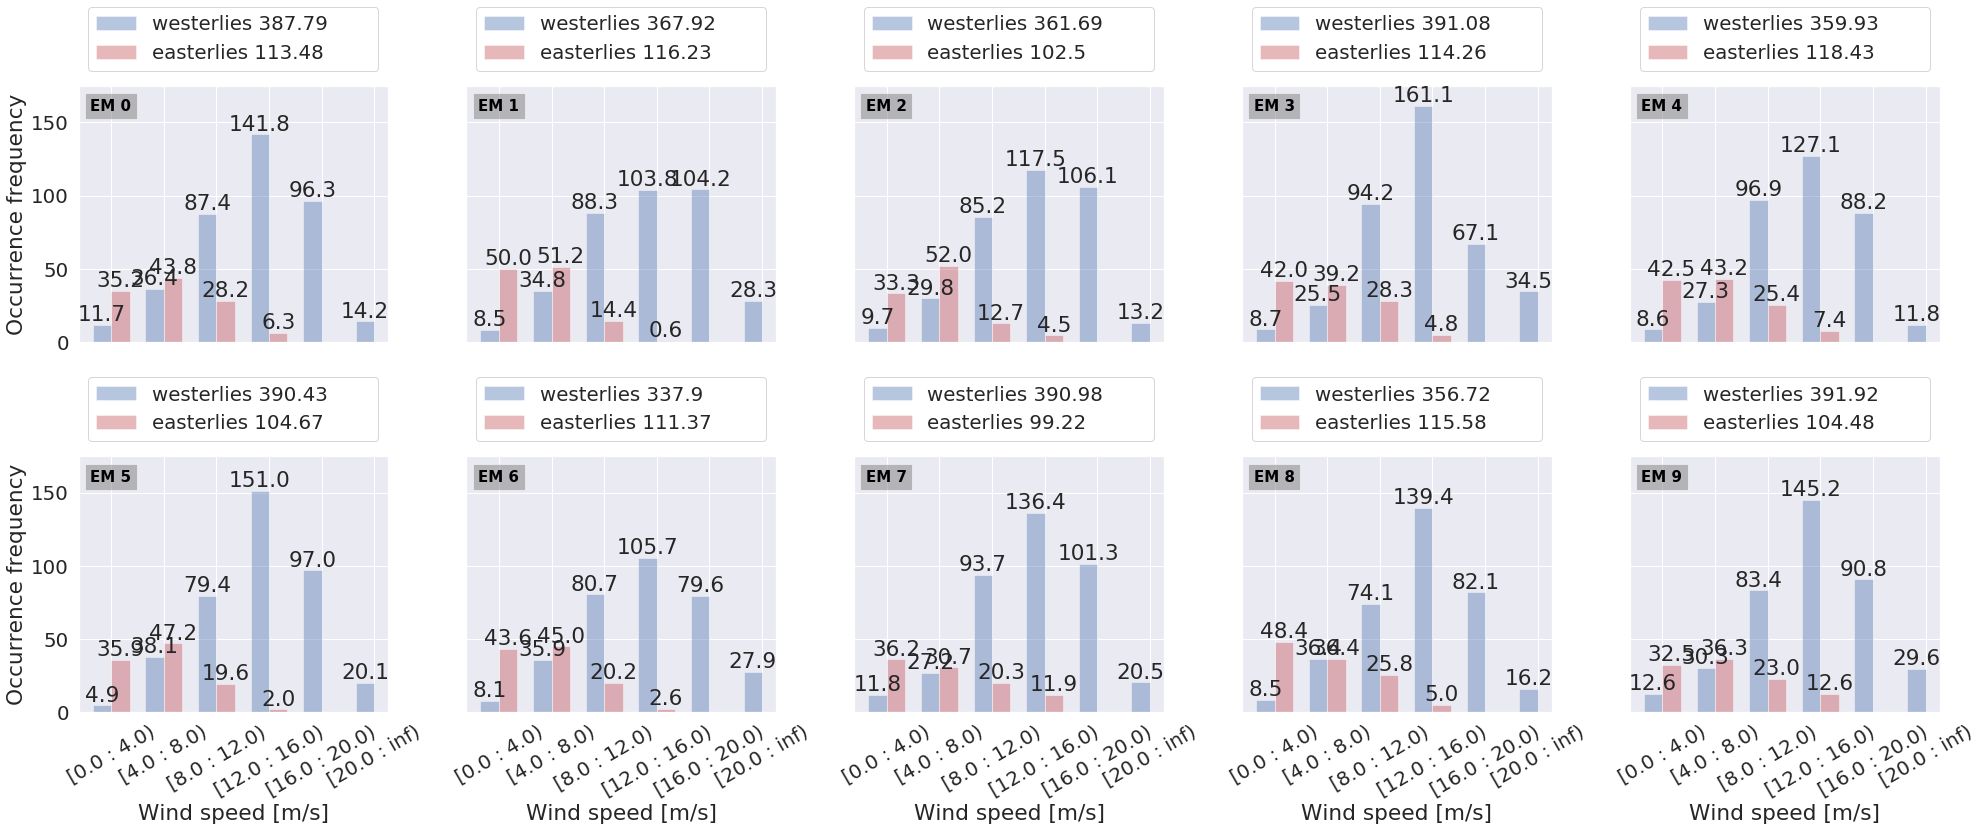

In [22]:
### for ensemble members
seaborn.set_context("paper")
seaborn.set(font_scale=1.8)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 5, sharey=True, sharex=True)
f.set_figheight(12)
f.set_figwidth(28)
f.subplots_adjust(hspace=.35, wspace=.15)

axs = axs.ravel()
for ens_memb in range(10):
    bar11 = axs[ens_memb].bar(np.arange(meps_precip_west_ws.shape[0])-bar_width/2, 
                  meps_precip_west_ws[:,ens_memb+1], width = bar_width,
            align='center', alpha=opacity, color='b', label='westerlies %s' %(np.round(np.nansum(meps_precip_west_ws[:,ens_memb+1]),2)))

    bar12 = axs[ens_memb].bar(np.arange(meps_precip_east_ws.shape[0])+bar_width/2, 
              meps_precip_east_ws[:,ens_memb+1], width = bar_width,
           align='center', alpha=opacity, color='r', label='easterlies %s' %(np.round(np.nansum(meps_precip_east_ws[:,ens_memb+1]),2)))

    axs[ens_memb].set_ylim([0, 175])
    if ens_memb == 5 or ens_memb == 6 or ens_memb == 7 or ens_memb == 8 or ens_memb == 9:
        axs[ens_memb].set_xlabel('Wind speed [m/s]')
    if ens_memb == 0 or ens_memb == 5:
        axs[ens_memb].set_ylabel('Occurrence frequency')
 #   axs[ens_memb].set_ylim([0, 50])
    axs[ens_memb].set_xticks(np.arange(meps_precip_west_ws.shape[0]))
    axs[ens_memb].set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)

    axs[ens_memb].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
    axs[ens_memb].text(0.17, 0.89, 'EM %s' %ens_memb,
        verticalalignment='bottom', horizontalalignment='right',
        transform=axs[ens_memb].transAxes,
        color='black', fontsize=15, fontweight='bold', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})
    
    # Add counts above the two bar graphs
    for rect in bar11 + bar12:
        height = rect.get_height()
        if np.isnan(height):
            continue
        else:
            axs[ens_memb].text(rect.get_x() + rect.get_width()/2.0, height, '%s' % (np.round(height,1)), ha='center', va='bottom')

plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()

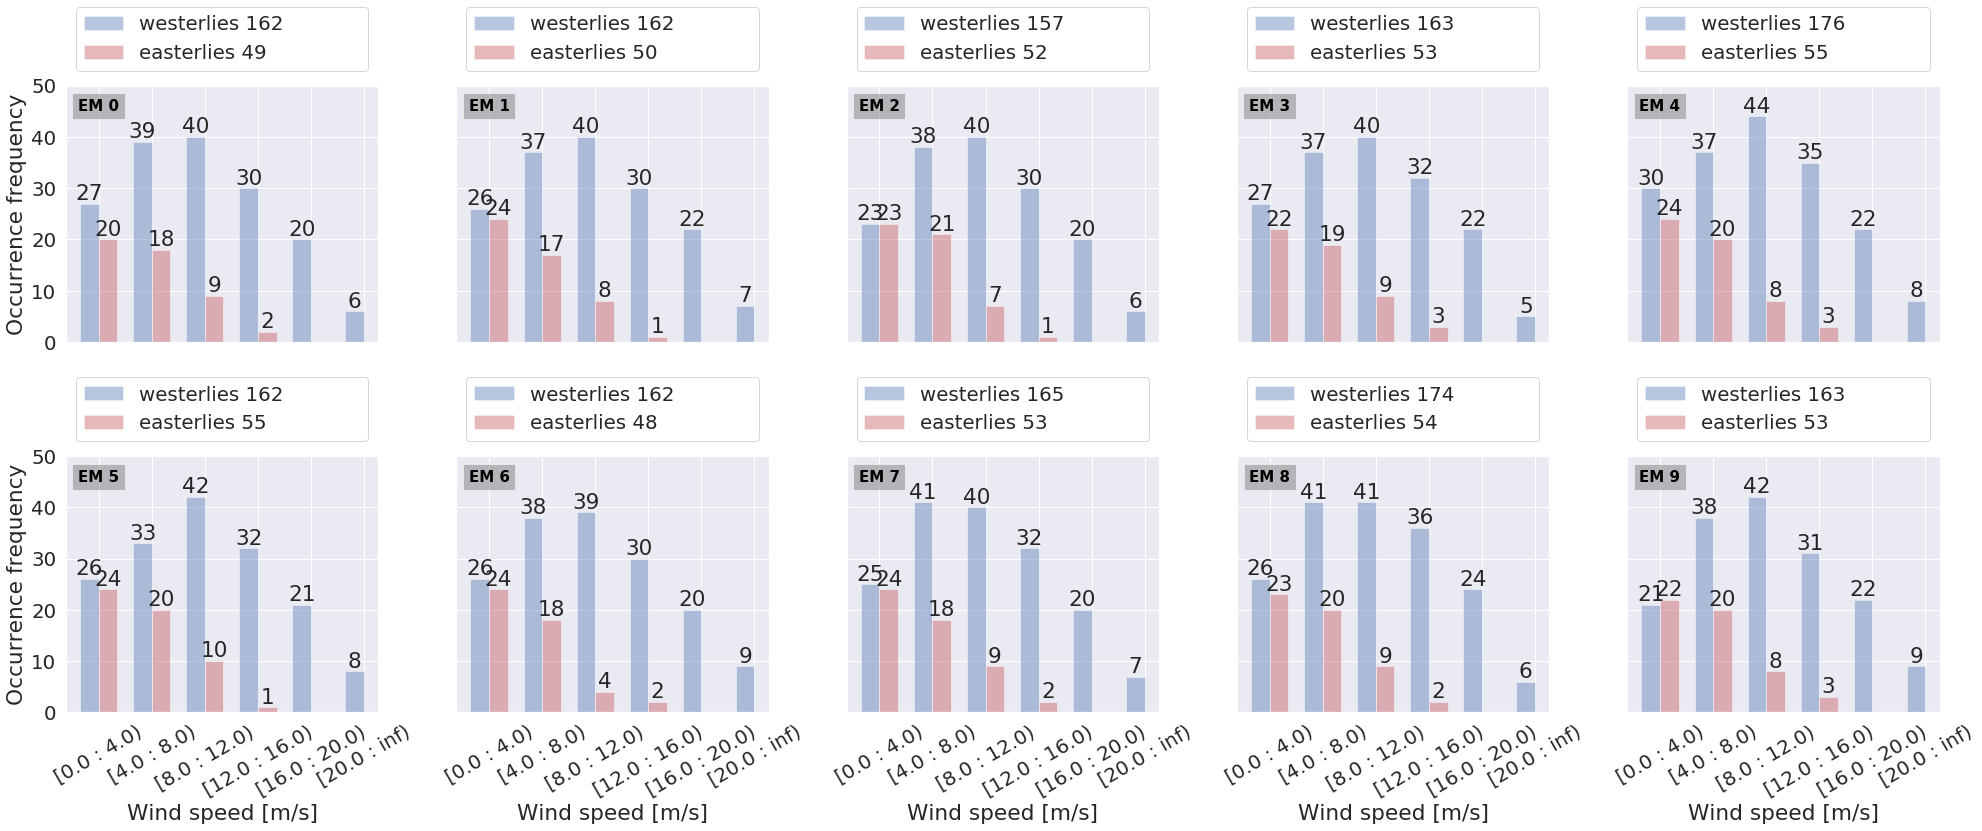

In [23]:
### for ensemble members
seaborn.set_context("paper")
seaborn.set(font_scale=1.8)
#plt.rcParams.update({'font.size': 40})
seaborn.set_style("darkgrid")

bar_width = 0.35
opacity = 0.4

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 5, sharey=True, sharex=True)
f.set_figheight(12)
f.set_figwidth(28)
f.subplots_adjust(hspace=.35, wspace=.15)

axs = axs.ravel()
for ens_memb in range(10):
    bar11 = axs[ens_memb].bar(np.arange(meps_west_count.shape[0])-bar_width/2, 
              meps_west_count[:,ens_memb], width = bar_width,
            align='center', alpha=opacity, color='b', label='westerlies %s' %int(np.round(np.nansum(meps_west_count[:,ens_memb]),0)))

    bar12 = axs[ens_memb].bar(np.arange(meps_east_count.shape[0])+bar_width/2, 
              meps_east_count[:,ens_memb], width = bar_width,
           align='center', alpha=opacity, color='r', label='easterlies %s' %int(np.round(np.nansum(meps_east_count[:,ens_memb]),0)))

    axs[ens_memb].set_ylim([0, 175])
    if ens_memb == 5 or ens_memb == 6 or ens_memb == 7 or ens_memb == 8 or ens_memb == 9:
        axs[ens_memb].set_xlabel('Wind speed [m/s]')
    if ens_memb == 0 or ens_memb == 5:
        axs[ens_memb].set_ylabel('Occurrence frequency')
    axs[ens_memb].set_ylim([0, 50])
    axs[ens_memb].set_xticks(np.arange(meps_west_count.shape[0]))
    axs[ens_memb].set_xticklabels(['[0.0 : 4.0)', '[4.0 : 8.0)', '[8.0 : 12.0)', '[12.0 : 16.0)', '[16.0 : 20.0)', '[20.0 : inf)'], rotation=30)

    axs[ens_memb].legend(bbox_to_anchor=(0,1.02,1,0.2), loc='lower left', mode='expand',fancybox=True, facecolor ='white')
    axs[ens_memb].text(0.17, 0.89, 'EM %s' %ens_memb,
        verticalalignment='bottom', horizontalalignment='right',
        transform=axs[ens_memb].transAxes,
        color='black', fontsize=15, fontweight='bold', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5.5})
    
    # Add counts above the two bar graphs
    for rect in bar11 + bar12:
        height = rect.get_height()
        if np.isnan(height):
            continue
        else:
            axs[ens_memb].text(rect.get_x() + rect.get_width()/2.0, height, '%s' % int(np.round(height,0)), ha='center', va='bottom')

plt.tight_layout()

if savefig == 1:
    cF.createFolder('%s/' %(figdir))
    fig_name = 'winter_16_17_MEPS_count'
    plt.savefig('%s/%s.%s' %(figdir, fig_name,form), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(figdir, fig_name))
else:
    plt.show()